# Natural Gas Price - Time Series Forecasting

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading and Displaying Natural Gas Price Time Series Data

In [6]:
data = pd.read_csv('monthly_csv.csv',header=0,index_col=0,parse_dates=True)
data.head()


,Price
Month,
1997-01-01,3.45
1997-02-01,2.15
1997-03-01,1.89
1997-04-01,2.03
1997-05-01,2.25


In [7]:
data.tail()

,Price
Month,
2020-04-01,1.74
2020-05-01,1.75
2020-06-01,1.63
2020-07-01,1.77
2020-08-01,2.30


# Visualizing House Price time series data

<Axes: xlabel='Month', ylabel='Price'>

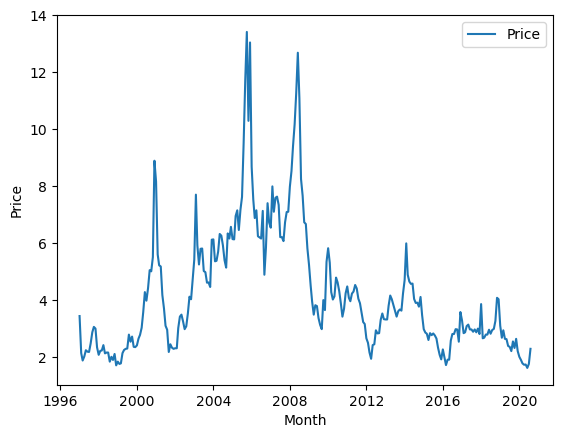

In [8]:
plt.xlabel('Month')
plt.ylabel('Price')
sns.lineplot(data)

# Extract components of Time series analysis

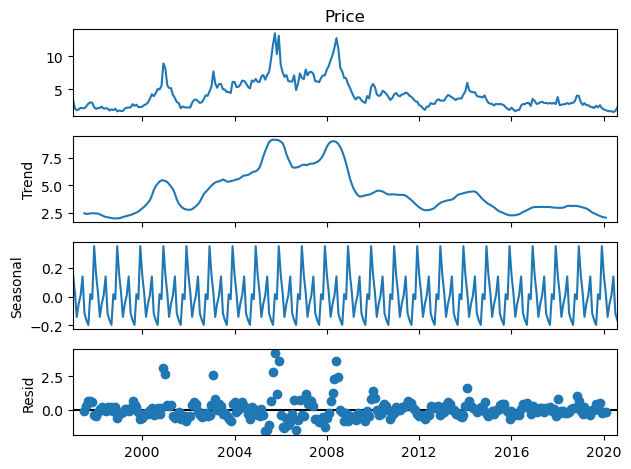

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(data['Price'],model='additive')
decompose.plot()
plt.show()

<Axes: xlabel='Month', ylabel='Price'>

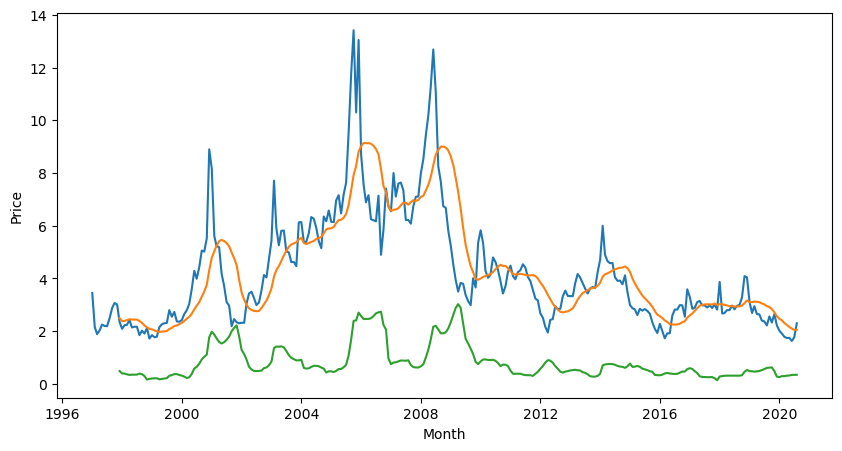

In [12]:
data['rollmean']=data.Price.rolling(window=12).mean()
data['rollstd']=data.Price.rolling(window=12).std()

plt.figure(figsize=(10,5))
sns.lineplot(data=data,x=data.index,y=data.Price)
sns.lineplot(data=data,x=data.index,y=data.rollmean)
sns.lineplot(data=data,x=data.index,y=data.rollstd)

# Testing For Stationarity

In [27]:
from statsmodels.tsa.stattools import adfuller

adfTest=adfuller(data['Price'],autolag='AIC')
stats= pd.Series(adfTest[0:4],index=['Test Statistics','P-value','#lags used','number of observation used'])
print(stats)
for key,values in adfTest[4].items():
    print('Criticality', key,":",values)

Test Statistics                -2.054251
P-value                         0.263304
#lags used                      9.000000
number of observation used    274.000000
dtype: float64
Criticality 1% : -3.4544435065994437
Criticality 5% : -2.8721468827772774
Criticality 10% : -2.572422013959188


# Using Differencing method to make data stationary

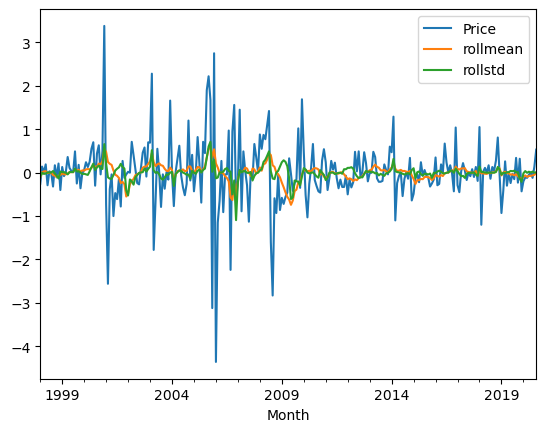

In [29]:
    data_diff=data.diff().dropna()
    data_diff.plot()
    plt.show()

In [30]:
adfTest=adfuller(data_diff['Price'],autolag='AIC')
stats= pd.Series(adfTest[0:4],index=['Test Statistics','P-value','#lags used','number of observation used'])
print(stats)
for key,values in adfTest[4].items():
    print('Criticality', key,":",values)

Test Statistics              -7.403772e+00
P-value                       7.436686e-11
#lags used                    8.000000e+00
number of observation used    2.630000e+02
dtype: float64
Criticality 1% : -3.4554613060274972
Criticality 5% : -2.8725931472675046
Criticality 10% : -2.5726600403359887


In [15]:
data1=data[['Price']].copy(deep=True)
data1.head()

,Price
Month,
1997-01-01,3.45
1997-02-01,2.15
1997-03-01,1.89
1997-04-01,2.03
1997-05-01,2.25


In [17]:
data1['firstDiff']=data1['Price'].diff()
data1.head()

,Price,firstDiff
Month,,
1997-01-01,3.45,NaN
1997-02-01,2.15,-1.30
1997-03-01,1.89,-0.26
1997-04-01,2.03,0.14
1997-05-01,2.25,0.22


# Autocorrelation Function and Partial Autocorrelation Function

In [18]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

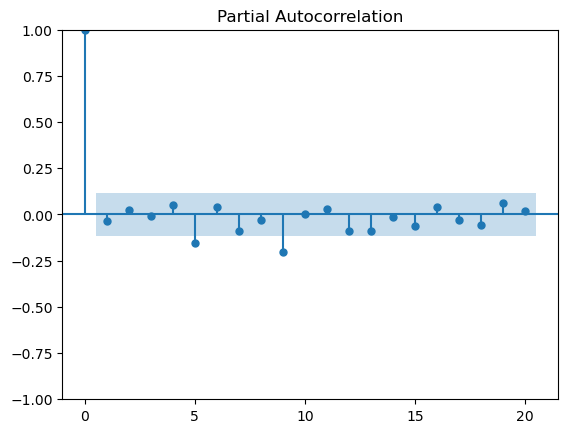

In [19]:
plot_pacf(data1['firstDiff'].dropna(),lags=20);

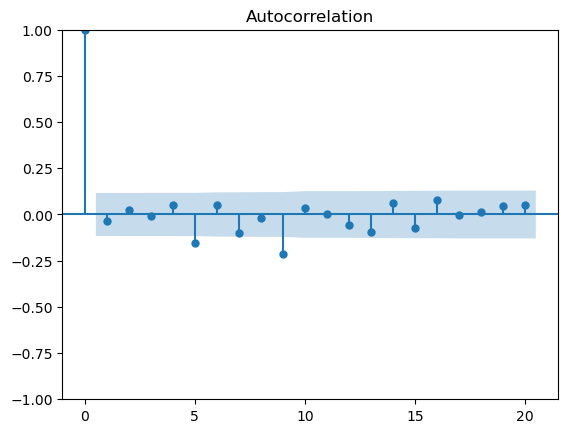

In [20]:
plot_acf(data1['firstDiff'].dropna(),lags=20);

# Selecting model for Natural Gas Price time series data

In [21]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")
stepwise_fit=auto_arima(data['Price'],trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=630.682, Time=0.96 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=635.577, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=637.268, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=637.283, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=633.585, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=641.116, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=633.843, Time=0.38 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=631.087, Time=0.90 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=631.116, Time=1.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=632.065, Time=0.32 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=635.173, Time=0.44 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=635.362, Time=0.54 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.26 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=628.701, Time=0.49 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=639.124, 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  284
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -309.351
Date:                Mon, 22 Apr 2024   AIC                            628.701
Time:                        02:37:39   BIC                            646.928
Sample:                    01-01-1997   HQIC                           636.010
                         - 08-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0741      0.052     -1.429      0.153      -0.176       0.028
ar.L2          0.8879      0.055     16.003      0.000       0.779       0.997
ma.L1         -0.0141      0.046     -0.310      0.757      -0.104       0.075
ma.L2         -0.9175      0.053    -17.326      0.000      -1.021      -0.814
sigma2         0.5203      0.022     23.296      0.000       0.477       0.564
===================================================================================
Ljung-Box (L1) (Q):                   1.06   Jarque-Bera (JB):               516.14
Prob(Q):                              0.30   Prob(JB):                         0.00
Heteroskedasticity (H):               0.31   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Splitting Data for Training and Testing

In [22]:
data1_train=data1[:200]
data1_test=data1[200:]

# Using SARIMAX model

2013-09-01    3.566074
2013-10-01    4.010598
2013-11-01    3.356549
2013-12-01    4.059088
2014-01-01    4.047260
                ...   
2020-04-01    1.866973
2020-05-01    1.744102
2020-06-01    1.919629
2020-07-01    1.431360
2020-08-01    1.718476
Freq: MS, Name: ARIMA Predictions, Length: 84, dtype: float64


<Axes: xlabel='Month'>

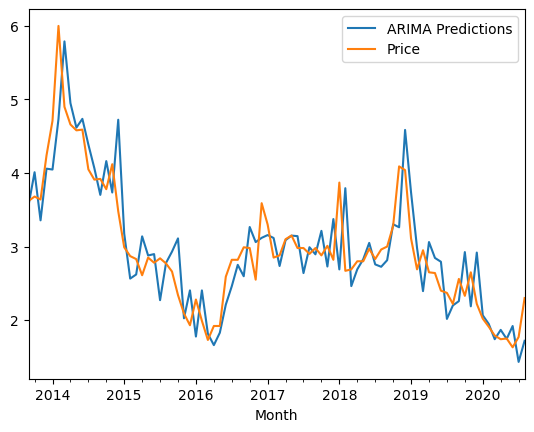

In [29]:
import statsmodels.api as sm

model1=sm.tsa.statespace.SARIMAX(data1['Price'],order=(2,1,2),seasonal_order=(2,1,2,12))
results=model1.fit()

start=len(data1_train)
end=len(data1_train)+len(data1_test)-1
pred=results.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
print(pred)

pred.index=data1.index[start:end+1]
pred.plot(legend=True)
data1_test['Price'].plot(legend=True)

# evaluate the performance using the root mean-squared error

In [31]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [39]:

mean_squared_error(data1_test['Price'],pred)


0.18982376456878736

In [40]:
sqrt(mean_squared_error(data1_test['Price'],pred))

0.43568769155071085

# Creating dataset for future prediction of Natural Gas price

In [24]:
from pandas.tseries.offsets import DateOffset
future_dates=[data1.index[-1]+DateOffset(months=x)for x in range(0,13)]

future_dataset_data1=pd.DataFrame(index=future_dates[1:],columns=data1.columns)
future_dataset_data1.tail()

,Price,firstDiff
2021-04-01,NaN,NaN
2021-05-01,NaN,NaN
2021-06-01,NaN,NaN
2021-07-01,NaN,NaN
2021-08-01,NaN,NaN


In [26]:
future_data1=pd.concat([data1,future_dataset_data1])

# Ploting the Prediction of Natural Gas Price for next 12 months

<Axes: >

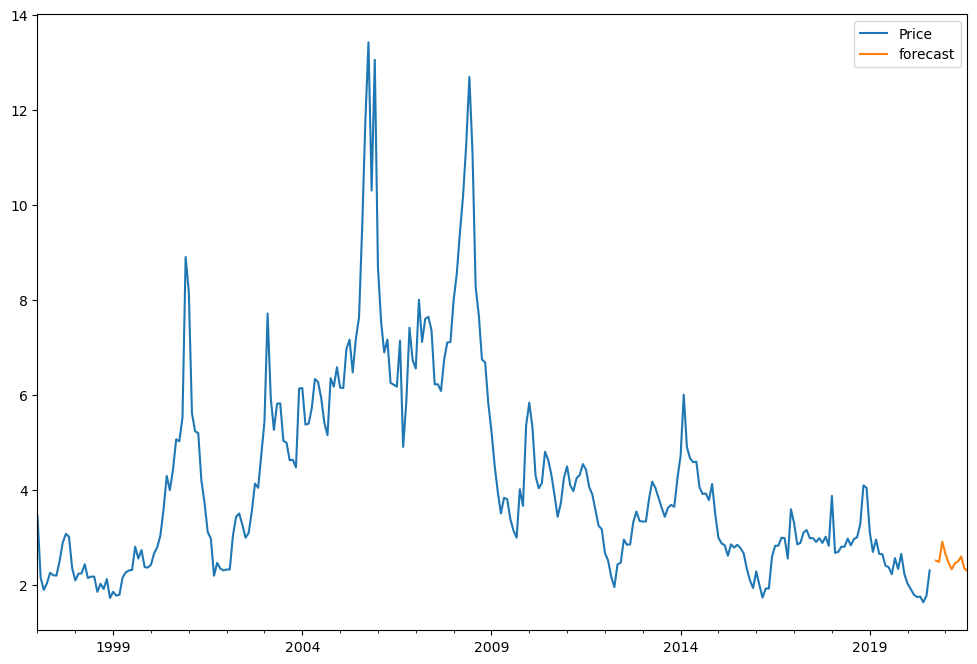

In [27]:
future_data1['forecast']=results.predict(start=285, end=297,dynamic=True)
future_data1[['Price','forecast']].plot(figsize=(12,8))

In [28]:
future_data1['forecast'].tail(12)

2020-09-01         NaN
2020-10-01    2.507258
2020-11-01    2.480080
2020-12-01    2.904384
2021-01-01    2.650332
2021-02-01    2.462637
2021-03-01    2.324665
2021-04-01    2.448652
2021-05-01    2.487970
2021-06-01    2.595151
2021-07-01    2.343622
2021-08-01    2.288027
Name: forecast, dtype: float64